In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0,1]
    rotation_range=20,        # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,    # Randomly shift images horizontally
    height_shift_range=0.2,   # Randomly shift images vertically
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Zoom in randomly
    horizontal_flip=True,     # Flip images horizontally
    fill_mode='nearest'       # Fill pixels after transformations
)

In [3]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\MGM\Desktop\saloni\Animal_data\Animal_data\train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # since only 1 class
)

validation_generator = validation_datagen.flow_from_directory(
    r'C:\Users\MGM\Desktop\saloni\Animal_data\Animal_data\validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # since only 1 class
)


Found 123 images belonging to 1 classes.
Found 2500 images belonging to 1 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),  # 32 filters, 3x3 kernel, ReLU activation
    MaxPooling2D(2, 2),  # Downsample by factor of 2
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),  # Flatten 3D feature maps to 1D feature vector
    Dropout(0.5),  # Dropout to prevent overfitting

    Dense(512, activation='relu'),  # Fully connected layer with 512 neurons
    Dense(train_generator.num_classes, activation='softmax')  # Output layer, number of neurons = number of classes
])

C:\Users\MGM\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    loss='categorical_crossentropy',  # Suitable loss for multi-class classification
    optimizer=Adam(learning_rate=0.001),  # Adam optimizer with learning rate 0.001
    metrics=['accuracy']  # Track accuracy metric
)

In [7]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Number of batches per epoch
    epochs=20,  # Number of training epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

C:\Users\MGM\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


C:\Users\MGM\anaconda3\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\MGM\anaconda3\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 2/20
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00

C:\Users\MGM\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s

In [8]:
model.save('animal_classifier_model.h5')

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_animal(img_path):
    # Load image with target size
    img = image.load_img(img_path, target_size=(150, 150))
    # Convert image to array
    img_array = image.img_to_array(img)
    # Scale pixel values to [0,1]
    img_array = img_array / 255.0
    # Expand dims to add batch size dimension
    img_array = np.expand_dims(img_array, axis=0)

    # Predict class probabilities
    predictions = model.predict(img_array)
    # Get the index of the highest probability
    predicted_class_index = np.argmax(predictions)
    # Map class index to class label
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class_index]

    return predicted_label

In [ ]:
img_path = r"C:\Users\MGM\Desktop\saloni\Animal_data\Animal_data\validation\cats\cat.119.jpg"
print(f"Predicted animal: {predict_animal(img_path)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Predicted animal: Cat


C:\Users\MGM\anaconda3\Lib\site-packages\keras\src\ops\nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


In [ ]:
img_path = rimg_path = r"C:\Users\MGM\Desktop\saloni\Animal_data\Animal_data\validation\cats\cat.119.jpg"
print(f"Predicted animal: {predict_animal(img_path)}")
print(f"Predicted animal: {predict_animal(img_path)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted animal: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted animal: Cat


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


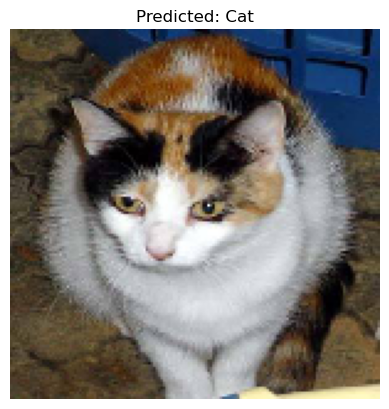

In [42]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_and_show(img_path):
    # Load and preprocess image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class_index]

    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example usage
img_path = r"C:\Users\MGM\Desktop\saloni\Animal_data\Animal_data\validation\cats\cat.111.jpg"
predict_and_show(img_path)


In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(accuracy_score)
print(confusion_matrix)
print(classification_report)


<function accuracy_score at 0x0000020D34A49EE0>
<function confusion_matrix at 0x0000020D34A4A020>
<function classification_report at 0x0000020D34A4B380>


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# 1. Get true labels from validation generator
y_true = validation_generator.classes  # true class indices

# 2. Predict on validation data
y_pred_probs = model.predict(validation_generator)

# 3. Convert predicted probabilities to class indices
if validation_generator.class_mode == 'binary':
    y_pred = np.argmax(y_pred_probs, axis=1)
else:  # for 'binary' classification
    y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# 4. Print metrics
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=list(validation_generator.class_indices.keys())))


79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step
Accuracy: 1.0
Confusion Matrix:
 [[2500]]
Classification Report:
               precision    recall  f1-score   support

        cats       1.00      1.00      1.00      2500

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



C:\Users\MGM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
